<a href="https://colab.research.google.com/github/Skeo220/UCI-Machine-Learning-Repository/blob/main/Model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Packages

In [97]:
pip install xgboost

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [64]:
full_df = pd.read_csv('/content/full_df.csv', low_memory=False)
full_df.head()

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_unknown,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,...,month_sep,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success,age,balance,day_of_week,duration,y
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.519481,0.092259,0.133333,0.053070,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.337662,0.073067,0.133333,0.030704,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0.194805,0.072822,0.133333,0.015453,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0.376623,0.086476,0.133333,0.018707,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.194805,0.072812,0.133333,0.040260,0


In [65]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_management       45211 non-null  int64  
 1   job_technician       45211 non-null  int64  
 2   job_entrepreneur     45211 non-null  int64  
 3   job_blue-collar      45211 non-null  int64  
 4   job_unknown          45211 non-null  int64  
 5   job_retired          45211 non-null  int64  
 6   job_admin.           45211 non-null  int64  
 7   job_services         45211 non-null  int64  
 8   job_self-employed    45211 non-null  int64  
 9   job_unemployed       45211 non-null  int64  
 10  job_housemaid        45211 non-null  int64  
 11  job_student          45211 non-null  int64  
 12  marital_married      45211 non-null  int64  
 13  marital_single       45211 non-null  int64  
 14  marital_divorced     45211 non-null  int64  
 15  education_tertiary   45211 non-null 

### Logistic Regression

In [85]:
# Splitting the data
y = full_df['y']
X = full_df.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining and fitting the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [87]:
# Making predictions and evaluating the model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("Coefficients:", model.coef_)

Accuracy: 0.8988167643481145
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.35      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043

ROC-AUC Score: 0.662116027973524
Coefficients: [[ 0.00283809 -0.01215856 -0.03030597 -0.05842515 -0.01948657  0.08331357
   0.05399581 -0.00806036 -0.01248609  0.00628475 -0.04696525  0.07277151
  -0.07068907  0.06617375  0.01505005  0.06970863 -0.00425033 -0.0046027
  -0.07989853  0.00508211 -0.00508211 -0.17295415  0.17295415  0.07444941
  -0.07444941 -0.43045796  0.34042845  0.13162136 -0.02333152  0.25974843
  -0.18008945 -0.13111064  0.16798914 -0.12682273  0.07159938 -0.14008193
   0.03114062  0.19585844  0.10887232  0.14514967 -0.12851582 -0.0595671
   0.00369099  0.37483843  0.01874145  0.02897315  0.0527

In [88]:
# Cross-validation
scores = cross_val_score(model, scaler.transform(X), y, cv=5)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.89273471 0.87325813 0.83963725 0.59278921 0.32105729]


In [89]:
# getting the probabilities
y_prob_reg = model.predict_proba(X_test_scaled)[:, 1]

In [90]:
fpr, tpr, _ = roc_curve(y_test, y_prob_reg)
roc_auc = auc(fpr, tpr)

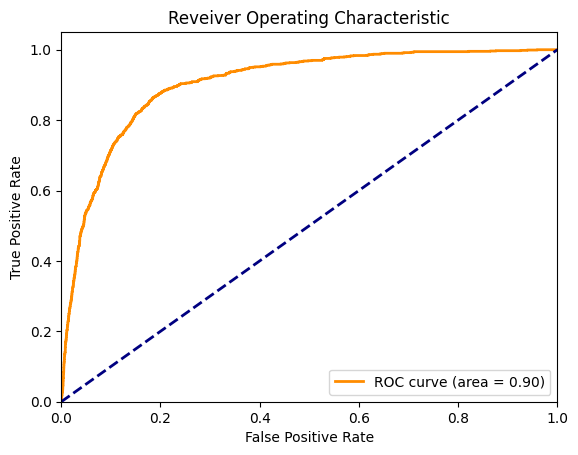

In [91]:
plt.figure()
plt.plot(fpr,tpr, color = 'darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reveiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [92]:
# model
rf_model = RandomForestClassifier(random_state=42)

In [93]:
# model fitting
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [94]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

Accuracy: 0.9020236647130377
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.65      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

ROC-AUC Score: 0.6872691234482975


In [95]:
# ROC Curve
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

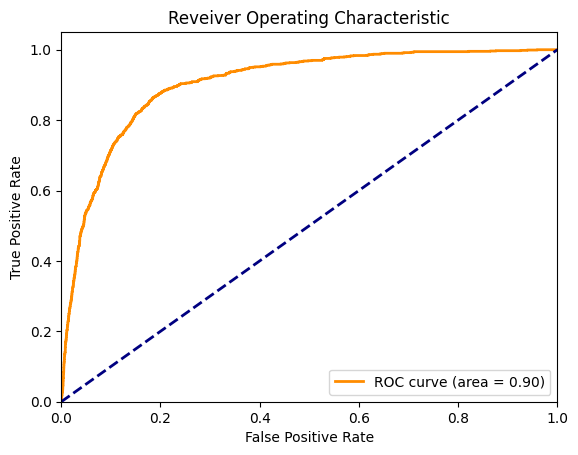

In [96]:
# figure
plt.figure()
plt.plot(fpr,tpr, color = 'darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reveiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### XGboost

In [99]:
# model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metrics='logloss')

In [100]:
# model fitting
xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:23:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [101]:
# prediction
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [102]:
# model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_xgb))

Accuracy: 0.9064469755612076
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.64      0.51      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.74      0.76      9043
weighted avg       0.90      0.91      0.90      9043

ROC-AUC score: 0.7364435236533776


In [105]:
# Plotting ROC Curve
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test,  y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

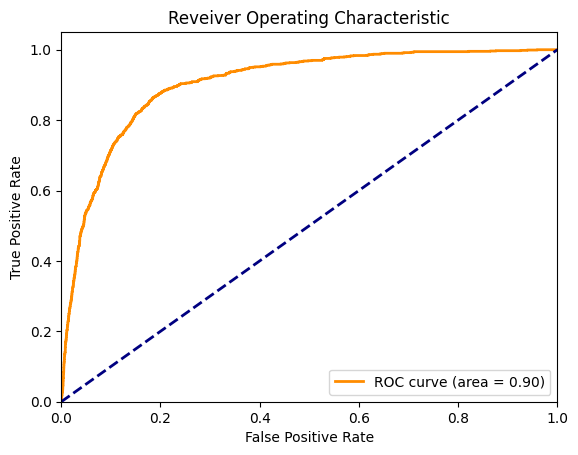

In [106]:
# figure
plt.figure()
plt.plot(fpr,tpr, color = 'darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reveiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()